In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense, Input, Dropout, add
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 

- iris 데이터 
1. sepal_length : 꽃받침 길이
2. sepal_width : 꽃받침 널이
3. petal_length : 꽃잎 길이
4. petal_width : 꽃잎 넓이
5. species : 종

In [3]:
# 문자변수의 원핫인코딩1
iris = sns.load_dataset("iris")
labelEncoder = LabelEncoder()
iris['y'] = labelEncoder.fit_transform(iris['species'])
to_categorical(iris['y'])[::25] # to_categorical의 결과는 numpy 배열

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [4]:
# 문자변수의 원핫인코딩2
iris = sns.load_dataset('iris')
pd.get_dummies(iris.species).values # pd.get_dummmies 결과는 데이터프레임
pd.get_dummies(iris.species).to_numpy()[::25]

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [5]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
# iris.info() 결측치 있으면 결측치 처리
# iris['species'].value_counts() 종속변수의 분포

# 독립변수와 종속변벼수 분리
iris_X = iris.iloc[:, :-1].to_numpy()
iris_y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_y).to_numpy()

# 훈련셋과 테스트셋 = 8 : 2
X_train, X_test, Y_train, Y_Test = train_test_split(iris_X, iris_Y, 
                                                    test_size=0.2, 
                                                    stratify=iris_Y # 층화추출 : 균등한 비율로 추출
                                                    )
print(iris_X.shape, iris_Y.shape)                                                    
print(X_train.shape, X_test.shape, Y_train.shape, Y_Test.shape)

(150, 4) (150, 3)
(120, 4) (30, 4) (120, 3) (30, 3)


In [54]:
# 2. 모델구성(입력4, 출력3)
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                320       
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 16)                1040      
                                                                 
 dense_26 (Dense)            (None, 3)                 51        
                                                                 
Total params: 17,987
Trainable params: 17,987
Non-trai

In [55]:
# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습 : epoch마다 val_accuracy값이 좋아지고 있으면 model 자동 저장(콜백추가)
    # 모델 자동 저장될 경로 : ./model/iris-00X-val0.XXXX.h5
import os
model_save_folder = './model_iris/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'

# 모델 자동 저장할 코랙 객체
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_accuracy', 
                             mode='max', 
                             save_best_only=True, # False : 매번 저장
                             verbose=0
                             )
# 조기 종료 콜백 객체
early_stopping = EarlyStopping(monitor='val_loss', patience=60)
hist = model.fit(X_train, Y_train, epochs=500, validation_split=0.2, verbose=1, callbacks=[early_stopping, checkpoint])


Epoch 1/500
3/3 [==============================] - 1s 126ms/step - loss: 1.0977 - accuracy: 0.2708 - val_loss: 1.0297 - val_accuracy: 0.2083
Epoch 2/500
3/3 [==============================] - 0s 31ms/step - loss: 0.9982 - accuracy: 0.4792 - val_loss: 0.9571 - val_accuracy: 0.5833
Epoch 3/500
3/3 [==============================] - 0s 21ms/step - loss: 0.9419 - accuracy: 0.6250 - val_loss: 0.8966 - val_accuracy: 0.5833
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 0.8708 - accuracy: 0.6771 - val_loss: 0.8389 - val_accuracy: 0.5833
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.8055 - accuracy: 0.6875 - val_loss: 0.7875 - val_accuracy: 0.5833
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 0.7490 - accuracy: 0.6875 - val_loss: 0.7363 - val_accuracy: 0.5833
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.6990 - accuracy: 0.6875 - val_loss: 0.6894 - val_accuracy: 0.5833
Epoch 8/500
3/3 [==

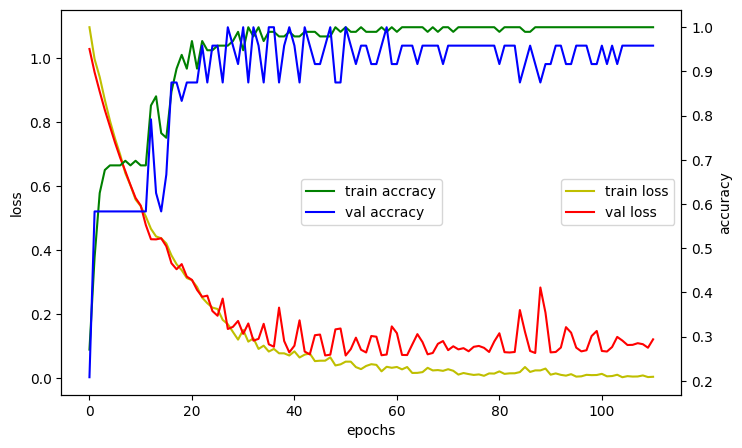

In [56]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


In [60]:
# 6. 모델 평가(evaluate, 교차, recall, precision)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
loss, acc = model.evaluate(X_test, Y_Test)
loss, acc
#모델의 recall과 precision을 위해서 실제값과 예측값
real = Y_Test.argmax(axis=1)
pred = model.predict(X_test).argmax(axis=1)
recall = recall_score(real,pred, average='weighted') # average = 'weighted' L
precision = precision_score(real,pred, average='weighted')
f1 = f1_score(real,pred,average='weighted')
print('model accuracy :', acc)
print('model recall :', recall)
print('model precision :', precision)
print('model f1 score :', f1)

1/1 [==============================] - 0s 21ms/step
model accuracy : 0.8999999761581421
model recall : 0.9
model precision : 0.9230769230769231
model f1 score : 0.8976982097186702


In [61]:
model2 = load_model('model_iris/iris-028-val1.0000.h5')
loss, acc=  model2.evaluate(X_test, Y_Test)
pred = model2.predict(X_test).argmax(axis=1)
recall = recall_score(real,pred, average='weighted') # average = 'weighted' L
precision = precision_score(real,pred, average='weighted')
f1 = f1_score(real,pred,average='weighted')

print('model accuracy :', acc)
print('model recall :', recall)
print('model precision :', precision)
print('model f1 score :', f1)

1/1 [==============================] - 0s 70ms/step
model accuracy : 0.8999999761581421
model recall : 0.9
model precision : 0.9230769230769231
model f1 score : 0.8976982097186702


In [62]:
# 모델 저장 및 사용
save_model(model, 'model_iris/iris.h5')

In [66]:
model.predict([[6.3,3.3,6.0,2.5]]).argmax(axis=1)

1/1 [==============================] - 0s 45ms/step


array([2], dtype=int64)